In [1]:
# Train a neural network for phoneme classification on TIMIT database
import sys
sys.path.append("../")
from utils.util import *

In [2]:
X_train, y_train, X_test, y_test = get_matrices()

In [30]:
import tensorflow as tf
from tensorflow.keras import layers

input_dim = 195  # Number of features
num_classes = 58  # Number of classes

# Sample model for illustrative purposes
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile with standard cross-entropy loss, but also monitor top-k accuracy
k = 5  # Or whatever value of 'k' you want
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.SparseTopKCategoricalAccuracy(k=k)]
)

# Training (using dummy data for illustration)
# X_train, Y_train, X_val, Y_val should be defined elsewhere in your code
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Epoch 1/10
5170/5170 [==============================] - 3s 645us/step - loss: 1.7135 - accuracy: 0.4652 - sparse_top_k_categorical_accuracy: 0.8626 - val_loss: 1.6107 - val_accuracy: 0.4834 - val_sparse_top_k_categorical_accuracy: 0.8830
Epoch 2/10
5170/5170 [==============================] - 3s 652us/step - loss: 1.4953 - accuracy: 0.5198 - sparse_top_k_categorical_accuracy: 0.9032 - val_loss: 1.5409 - val_accuracy: 0.5036 - val_sparse_top_k_categorical_accuracy: 0.8953
Epoch 3/10
5170/5170 [==============================] - 3s 638us/step - loss: 1.4328 - accuracy: 0.5371 - sparse_top_k_categorical_accuracy: 0.9118 - val_loss: 1.4728 - val_accuracy: 0.5179 - val_sparse_top_k_categorical_accuracy: 0.9050
Epoch 4/10
5170/5170 [==============================] - 3s 617us/step - loss: 1.3931 - accuracy: 0.5507 - sparse_top_k_categorical_accuracy: 0.9160 - val_loss: 1.4507 - val_accuracy: 0.5282 - val_sparse_top_k_categorical_accuracy: 0.9117
Epoch 5/10
5170/5170 [==========================

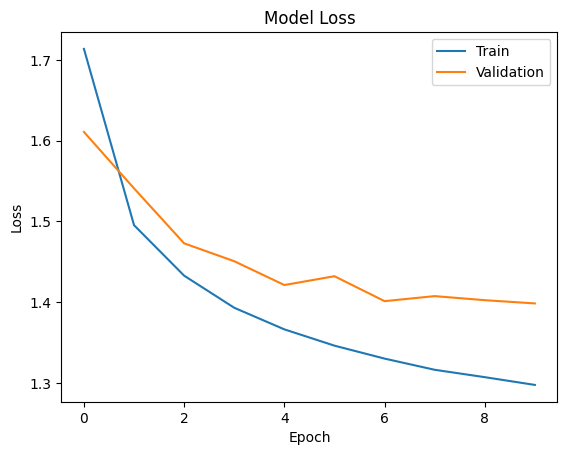

In [31]:
# Plot the loss and val_loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()